# 1. Analyze the Facebook Ad Library data from since May 2018.

In [1]:
from google.colab import files

uploaded = files.upload()

Saving FacebookAdLibraryReport_2019-10-28_US_lifelong_advertisers.xlsx to FacebookAdLibraryReport_2019-10-28_US_lifelong_advertisers.xlsx


In [0]:
import pandas as pd

In [0]:
df = pd.read_excel("FacebookAdLibraryReport_2019-10-28_US_lifelong_advertisers.xlsx")

In [4]:
df.head()

,Page ID,Page Name,Disclaimer,Amount Spent (USD),Number of Ads in Library,Average
0,20531316728,Facebook,Facebook,10900293,33,330311.909091
1,2078188632448740,Amazon Prime,These ads ran without a disclaimer,171995,1,171995.000000
2,117580534956446,Kellogg's Frosted Flakes,Kellogg’s Frosted Flakes,525712,5,105142.400000
3,306397722885,Kellogg's Rice Krispies,Kellogg's Rice Krispies,369125,4,92281.250000
4,92462956819,Dawn,These ads ran without a disclaimer,148834,2,74417.000000


In [0]:
demo_candid = ["Beto O'Rourke","Michael Bennet", "Joe Biden", "Joseph R. Biden Jr.", "Cory Booker", "Steve Bullock", "Pete Buttigieg", "Julián Castro",
               "John Delaney", "Tulsi Gabbard", "Kamala Harris", "Amy Klobuchar", "Wayne Messam", "Bernie Sanders", "Bernard Sanders", "Joe Sestak", 
               "Tom Steyer", "Elizabeth Warren", "Marianne Williamson", "Andrew Yang", "Donald J. Trump", "Donald Trump"]

In [0]:
candidates = {}
for demo in demo_candid:
    candidates[demo] = []
for index, row in df.iterrows():
    for demo in demo_candid:
        if demo in str(row['Page Name']) and index not in candidates[demo]:
            candidates[demo].append(index)      

In [7]:
candidates

{'Amy Klobuchar': [4533, 6601, 9965, 27126, 61513],
 'Andrew Yang': [24966, 48474, 51863, 65231],
 'Bernard Sanders': [],
 'Bernie Sanders': [12527,
  15738,
  27418,
  30911,
  31009,
  32867,
  33446,
  38032,
  39889,
  40802,
  42019,
  45836,
  56439,
  69945,
  71375],
 "Beto O'Rourke": [4485,
  15340,
  34097,
  36392,
  45192,
  46688,
  46888,
  51971,
  54157,
  54828,
  56756,
  56834,
  59771,
  63912],
 'Cory Booker': [2656, 33230, 54519],
 'Donald J. Trump': [1819,
  3924,
  6905,
  6991,
  20657,
  25872,
  32617,
  37863,
  44139,
  48303,
  49051,
  56619,
  68327],
 'Donald Trump': [970,
  1316,
  2557,
  10405,
  10632,
  12082,
  12507,
  13578,
  14250,
  14534,
  17634,
  20611,
  20948,
  26553,
  28535,
  28835,
  29509,
  33423,
  34130,
  36905,
  39497,
  43045,
  46069,
  46249,
  47588,
  47705,
  48723,
  49777,
  49800,
  53056,
  53477,
  54980,
  58728,
  59239,
  59444,
  60270,
  61081,
  61107,
  61179,
  63568,
  67174,
  68043,
  68371,
  68386,
  

In [0]:
del candidates["Joseph R. Biden Jr."]
del candidates["Bernard Sanders"]
del candidates["John Delaney"]

In [0]:
candidates["Donald J. Trump"] = candidates["Donald J. Trump"] + candidates["Donald Trump"]
del candidates["Donald Trump"]

In [0]:
for key,item in candidates.items():
    new_df = df.loc[item, :]
    new_df.to_csv(key + ".csv", index=False)
    total_spending = new_df["Amount Spent (USD)"].sum()
    num_of_ads = new_df["Number of Ads in Library"].sum()
    candidates[key] = [total_spending,num_of_ads,total_spending/num_of_ads]

In [11]:
candidates

{'Amy Klobuchar': [2096436, 3671, 571.0803595750476],
 'Andrew Yang': [1368356, 10250, 133.4981463414634],
 'Bernie Sanders': [4219306, 44945, 93.87709422627655],
 "Beto O'Rourke": [9088654, 21071, 431.3347254520431],
 'Cory Booker': [2368601, 22103, 107.16196896348912],
 'Donald J. Trump': [22859695, 298978, 76.45945521075129],
 'Elizabeth Warren': [4728691, 29062, 162.7104466313399],
 'Joe Biden': [2809277, 7073, 397.1832320090485],
 'Joe Sestak': [641, 1, 641.0],
 'Julián Castro': [1806272, 4117, 438.73500121447654],
 'Kamala Harris': [3469689, 133809, 25.93016164831962],
 'Marianne Williamson': [1015510, 13816, 73.5024609148813],
 'Michael Bennet': [970243, 6745, 143.84625648628614],
 'Pete Buttigieg': [4956527, 45825, 108.16207310420076],
 'Steve Bullock': [325112, 4470, 72.73199105145414],
 'Tom Steyer': [12172272, 17084, 712.4954343245141],
 'Tulsi Gabbard': [634725, 3938, 161.17953275774505],
 'Wayne Messam': [12054, 56, 215.25]}

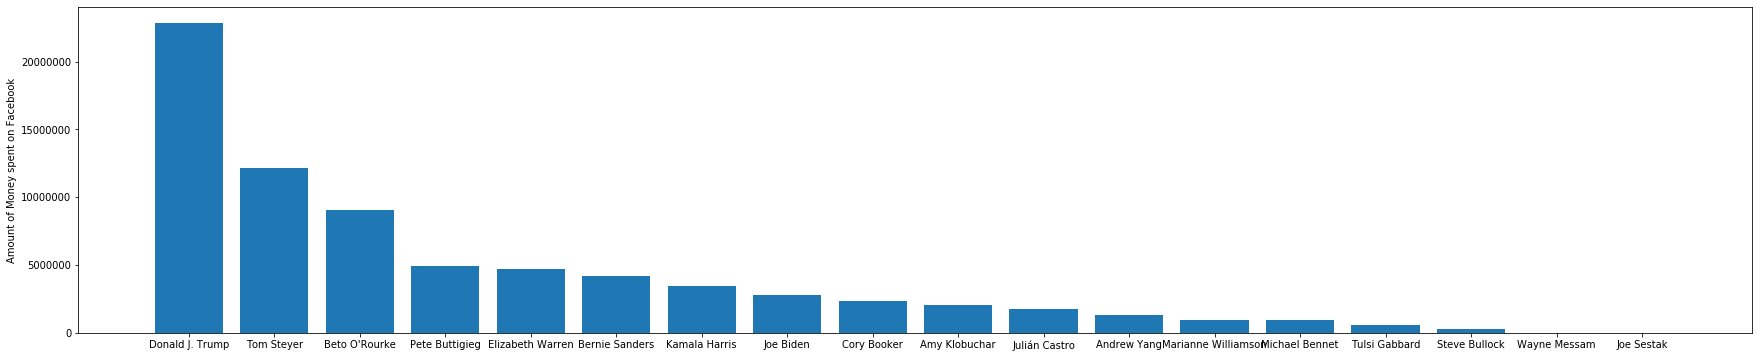

In [13]:
import matplotlib.pyplot as plt
yvals = []
nameset = []

for key, value in sorted(candidates.items(), key=lambda e: e[1][0], reverse=True):
    yvals.append(value[0])
    nameset.append(key)

plt.figure(figsize=(30, 6))
plt.ticklabel_format(style = 'plain')
plt.bar(nameset, yvals)
plt.ylabel('Amount of Money spent on Facebook')
plt.show()


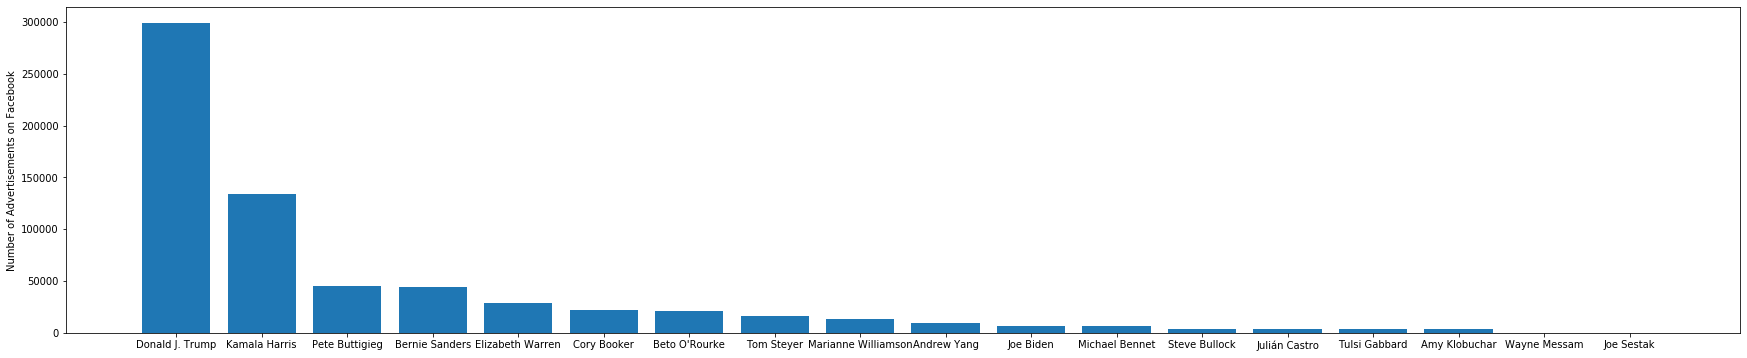

In [14]:
zvals = []
nameset = []

for key, value in sorted(candidates.items(), key=lambda e: e[1][1], reverse=True):
    zvals.append(value[1])
    nameset.append(key)

plt.figure(figsize=(30, 6))
plt.ticklabel_format(style = 'plain')
plt.bar(nameset, zvals)
plt.ylabel('Number of Advertisements on Facebook')
plt.show()

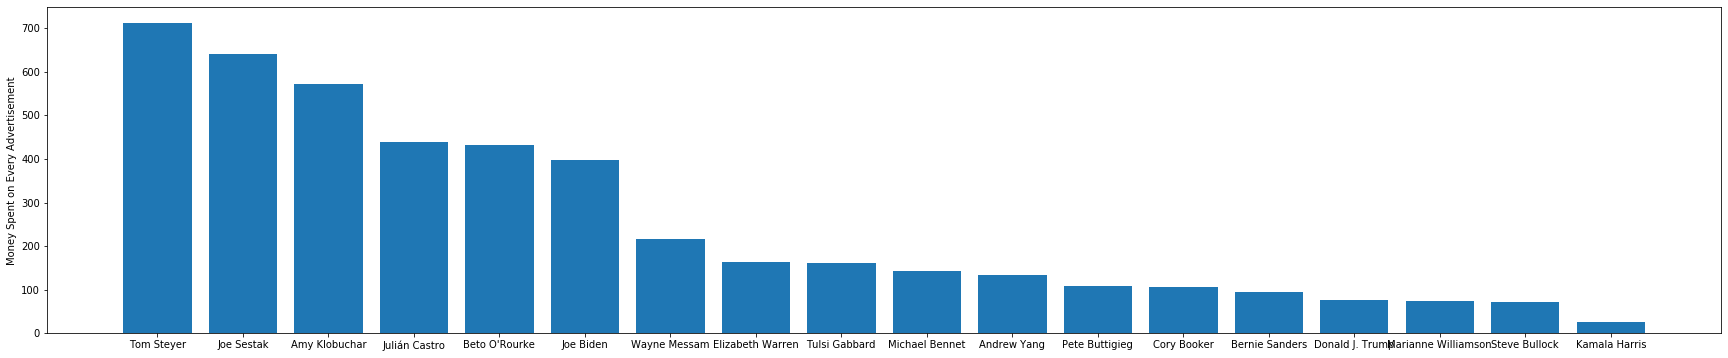

In [15]:
kvals = []
nameset = []

for key, value in sorted(candidates.items(), key=lambda e: e[1][2], reverse=True):
    kvals.append(value[2])
    nameset.append(key)

plt.figure(figsize=(30, 6))
plt.ticklabel_format(style = 'plain')
plt.bar(nameset, kvals)
plt.ylabel('Money Spent on Every Advertisement')
plt.show()

# 2. Analyze how Facebook disburse their money into the political campaigns using FEC data of 2016, 2018, 2020 elections.

In [0]:
df = pd.read_csv("Facebook to campaign.csv")

In [0]:
df.head()

,committee_id,committee_name,report_year,report_type,image_number,line_number,transaction_id,file_number,entity_type,entity_type_desc,unused_recipient_committee_id,recipient_committee_id,recipient_name,recipient_state,beneficiary_committee_name,national_committee_nonfederal_account,disbursement_type,disbursement_type_description,disbursement_description,memo_code,memo_code_full,disbursement_date,disbursement_amount,candidate_office,candidate_office_description,candidate_office_district,candidate_id,candidate_name,candidate_first_name,candidate_last_name,candidate_middle_name,candidate_prefix,candidate_suffix,candidate_office_state,candidate_office_state_full,election_type,election_type_full,fec_election_type_desc,fec_election_year,amendment_indicator,amendment_indicator_desc,schedule_type_full,load_date,original_sub_id,back_reference_transaction_id,back_reference_schedule_id,semi_annual_bundled_refund,payee_last_name,payee_first_name,payee_middle_name,category_code,category_code_full,conduit_committee_name,conduit_committee_street1,conduit_committee_street2,conduit_committee_city,conduit_committee_state,conduit_committee_zip,spender_committee_type,spender_committee_org_type,spender_committee_designation,filing_form,link_id,recipient_city,recipient_zip,disbursement_purpose_category,memo_text,two_year_transaction_period,schedule_type,sub_id,pdf_url,line_number_label,payee_prefix,payee_suffix,payee_employer,payee_occupation,ref_disp_excess_flg,comm_dt
0,C00502906,FACEBOOK INC. PAC,2016,M9,2.016090e+17,23,BA54443617F7A1DEEFC,1100793,CCM,CAMPAIGN COMMITTEE,C00547570,C00547570,PERDUE FOR SENATE,GA,NaN,NaN,24K,CONTRIBUTION MADE TO NON-AFFILIATED,UNCASHED 12/18/2015 CONTRIBUTION,NaN,NaN,42612,-2500,S,SENATE,NaN,S4GA11285,"PERDUE, DAVID ALFRED JR.",DAVID,PERDUE,ALFRED,NaN,JR.,GA,GEORGIA,P2020,NaN,PRIMARY,2020,A,ADD,ITEMIZED DISBURSEMENTS,42903.99114,NaN,NaN,NaN,0,NaN,NaN,NaN,11,Political Contributions,NaN,NaN,NaN,NaN,NaN,NaN,Q,C,B,F3X,4.092020e+18,ATLANTA,303552077,CONTRIBUTIONS,NaN,2016,SB,4.092320e+18,http://docquery.fec.gov/cgi-bin/fecimg/?201609...,Contributions to Federal Candidates/Committees...,NaN,NaN,NaN,NaN,NaN,NaN
1,C00502906,FACEBOOK INC. PAC,2016,M9,2.016090e+17,23,601ED32799665ECF522,1100793,CCM,CAMPAIGN COMMITTEE,C00394957,C00394957,SCALISE FOR CONGRESS,LA,NaN,NaN,24K,CONTRIBUTION MADE TO NON-AFFILIATED,UNCASHED 12/17/2015 CONTRIBUTION,NaN,NaN,42612,-2500,H,HOUSE,1.0,H0LA01087,"SCALISE, STEPHEN JOSEPH",STEPHEN,SCALISE,JOSEPH,NaN,NaN,LA,LOUISIANA,P2016,NaN,PRIMARY,2016,A,ADD,ITEMIZED DISBURSEMENTS,42903.99114,NaN,NaN,NaN,0,NaN,NaN,NaN,11,Political Contributions,NaN,NaN,NaN,NaN,NaN,NaN,Q,C,B,F3X,4.092020e+18,JEFFERSON,701833219,CONTRIBUTIONS,NaN,2016,SB,4.092320e+18,http://docquery.fec.gov/cgi-bin/fecimg/?201609...,Contributions to Federal Candidates/Committees...,NaN,NaN,NaN,NaN,NaN,NaN
2,C00502906,FACEBOOK INC. PAC,2016,M3,2.016030e+17,23,C34775F6354F94A580E,1056082,CCM,CAMPAIGN COMMITTEE,C00458844,C00458844,MARCO RUBIO FOR US SENATE,FL,NaN,NaN,24K,CONTRIBUTION MADE TO NON-AFFILIATED,UNCASHED 9/19/2014 CONTRIBUTION,NaN,NaN,42416,-1500,P,PRESIDENT,NaN,P60006723,"RUBIO, MARCO ANTONIO",MARCO,RUBIO,ANTONIO,NaN,NaN,NaN,NaN,P2016,NaN,PRIMARY,2016,A,ADD,ITEMIZED DISBURSEMENTS,42903.99114,NaN,NaN,NaN,0,NaN,NaN,NaN,11,Political Contributions,NaN,NaN,NaN,NaN,NaN,NaN,Q,C,B,F3X,4.031820e+18,MIAMI,332558701,CONTRIBUTIONS,NaN,2016,SB,4.031820e+18,http://docquery.fec.gov/cgi-bin/fecimg/?201603...,Contributions to Federal Candidates/Committees...,NaN,NaN,NaN,NaN,NaN,NaN
3,C00502906,FACEBOOK INC. PAC,2015,MY,2.016010e+17,23,E4444AB6BBF6F4F5E77,1043994,CCM,CAMPAIGN COMMITTEE,C00500207,C00500207,FRIENDS OF SUSAN BROOKS,IN,NaN,NaN,24K,CONTRIBUTION MADE TO NON-AFFILIATED,2016 PRIMARY,NaN,NaN,42159,500,H,HOUSE,5.0,H2IN05082,"BROOKS, SUSAN W.",SUSAN,BROOKS,W.,NaN,NaN,IN,INDIANA,P2016,NaN,PRIMARY,2016,N,NO CHANGE,ITEMIZED DISBURSEMENTS,42903.99114,NaN,NaN,NaN,0,NaN,NaN,NaN,11,Political Contributions,NaN,NaN,NaN,NaN,NaN,NaN,Q,C,B,F3X,4.012920e+1

In [0]:
df_year = df[['disbursement_amount','two_year_transaction_period']]

In [0]:
year_disbursement = df_year.groupby(by='two_year_transaction_period').sum()

In [0]:
year_disbursement

,disbursement_amount
two_year_transaction_period,
2016,655000
2018,709500
2020,216000


In [0]:
df_office = df[['disbursement_amount','candidate_office_description']]
office_disbursement = df_office.groupby(by='candidate_office_description').sum()
office_disbursement

,disbursement_amount
candidate_office_description,
HOUSE,640000
PRESIDENT,-1500
SENATE,457500


In [0]:
df_president = df[df['candidate_office_description'] =='PRESIDENT']
df_president

,committee_id,committee_name,report_year,report_type,image_number,line_number,transaction_id,file_number,entity_type,entity_type_desc,unused_recipient_committee_id,recipient_committee_id,recipient_name,recipient_state,beneficiary_committee_name,national_committee_nonfederal_account,disbursement_type,disbursement_type_description,disbursement_description,memo_code,memo_code_full,disbursement_date,disbursement_amount,candidate_office,candidate_office_description,candidate_office_district,candidate_id,candidate_name,candidate_first_name,candidate_last_name,candidate_middle_name,candidate_prefix,candidate_suffix,candidate_office_state,candidate_office_state_full,election_type,election_type_full,fec_election_type_desc,fec_election_year,amendment_indicator,amendment_indicator_desc,schedule_type_full,load_date,original_sub_id,back_reference_transaction_id,back_reference_schedule_id,semi_annual_bundled_refund,payee_last_name,payee_first_name,payee_middle_name,category_code,category_code_full,conduit_committee_name,conduit_committee_street1,conduit_committee_street2,conduit_committee_city,conduit_committee_state,conduit_committee_zip,spender_committee_type,spender_committee_org_type,spender_committee_designation,filing_form,link_id,recipient_city,recipient_zip,disbursement_purpose_category,memo_text,two_year_transaction_period,schedule_type,sub_id,pdf_url,line_number_label,payee_prefix,payee_suffix,payee_employer,payee_occupation,ref_disp_excess_flg,comm_dt
2,C00502906,FACEBOOK INC. PAC,2016,M3,2.016030e+17,23,C34775F6354F94A580E,1056082,CCM,CAMPAIGN COMMITTEE,C00458844,C00458844,MARCO RUBIO FOR US SENATE,FL,NaN,NaN,24K,CONTRIBUTION MADE TO NON-AFFILIATED,UNCASHED 9/19/2014 CONTRIBUTION,NaN,NaN,42416,-1500,P,PRESIDENT,NaN,P60006723,"RUBIO, MARCO ANTONIO",MARCO,RUBIO,ANTONIO,NaN,NaN,NaN,NaN,P2016,NaN,PRIMARY,2016,A,ADD,ITEMIZED DISBURSEMENTS,42903.99114,NaN,NaN,NaN,0,NaN,NaN,NaN,11,Political Contributions,NaN,NaN,NaN,NaN,NaN,NaN,Q,C,B,F3X,4.031820e+18,MIAMI,332558701,CONTRIBUTIONS,NaN,2016,SB,4.031820e+18,http://docquery.fec.gov/cgi-bin/fecimg/?201603...,Contributions to Federal Candidates/Committees...,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
df_state = df[['disbursement_amount','candidate_office_state_full']]
state_disbursement = df_state.groupby(by='candidate_office_state_full').sum()
state_disbursement = state_disbursement.sort_values(by=['disbursement_amount'], axis=0, ascending=False)
state_disbursement

,disbursement_amount
candidate_office_state_full,
CALIFORNIA,117500
CALIFORNIA,74500
NEW YORK,52000
TEXAS,48500
NORTH CAROLINA,47500
ILLINOIS,37000
OREGON,34000
PENNSYLVANIA,28000
OHIO,26500


In [0]:
df_city = df[['disbursement_amount','recipient_city']]
city_disbursement = df_city.groupby(by='recipient_city').sum()
city_disbursement = city_disbursement.sort_values(by=['disbursement_amount'], axis=0, ascending=False)
city_disbursement.head(20)

,disbursement_amount
recipient_city,
WASHINGTON,370000
ALEXANDRIA,66000
NEW YORK,40000
SACRAMENTO,26000
AUSTIN,26000
BAKERSFIELD,25000
SAN JOSE,25000
HELENA,23500
CHARLESTON,23000


In [0]:
df_candidate = df[['disbursement_amount','candidate_name']]
candidate_disbursement = df_candidate.groupby(by='candidate_name').sum()
candidate_disbursement = candidate_disbursement.sort_values(by=['disbursement_amount'], axis=0, ascending=False)
candidate_disbursement.head(20)

,disbursement_amount
candidate_name,
"PELOSI, NANCY",25000
"LOFGREN, ZOE",25000
"HOYER, STENY HAMILTON",25000
"MCCARTHY, KEVIN OWEN",25000
"WALDEN, GREGORY PAUL",18500
"SCALISE, STEPHEN JOSEPH",17500
"MCHENRY, PATRICK TIMOTHY",14000
"NEAL, RICHARD EDMUND",14000
"ESHOO, ANNA G.",13500
